**Capstone project 1**

**Phase A: Data Understanding and Preprocessing — The foundation of your premium prediction model for SecureLife Insurance Co.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('/content/Insurance Premium Prediction Dataset.csv')

In [3]:
# view the dataset
df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,56.0,Male,99990.0,Married,1.0,Master's,NaN,31.074627,Urban,Comprehensive,NaN,13,320.0,5,308.0,2022-12-10 15:21:39.078837,Poor,Yes,Daily,Condo
1,46.0,Male,2867.0,Single,1.0,Bachelor's,NaN,50.271335,Urban,Comprehensive,NaN,3,694.0,4,517.0,2023-01-31 15:21:39.078837,Good,Yes,Monthly,House
2,32.0,Female,30154.0,Divorced,3.0,Bachelor's,NaN,14.714909,Suburban,Comprehensive,2.0,16,652.0,8,849.0,2023-11-26 15:21:39.078837,Poor,No,Monthly,House
3,60.0,Female,48371.0,Divorced,0.0,PhD,Self-Employed,25.346926,Rural,Comprehensive,1.0,11,330.0,7,927.0,2023-02-27 15:21:39.078837,Poor,No,Rarely,Condo
4,25.0,Female,54174.0,Divorced,0.0,High School,Self-Employed,6.659499,Urban,Comprehensive,NaN,9,NaN,8,303.0,2020-11-25 15:21:39.078837,Poor,No,Rarely,Condo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68858,52.0,Male,34042.0,Married,4.0,Bachelor's,Unemployed,10.410883,Suburban,Basic,0.0,12,847.0,9,248.0,2024-08-11 15:21:39.130190,Average,Yes,Rarely,Apartment
68859,48.0,Female,74005.0,Divorced,3.0,Master's,Employed,8.824783,Urban,Premium,NaN,19,586.0,4,103.0,2020-10-12 15:21:39.130190,Poor,No,Weekly,House
68860,56.0,Male,19070.0,Divorced,4.0,High School,NaN,51.657770,Urban,Basic,2.0,4,826.0,6,1760.0,2024-07-24 15:21:39.130190,Average,Yes,Monthly,House
68861,32.0,Male,55098.0,Married,4.0,Bachelor's,Unemployed,29.513917,Rural,Premium,0.0,19,718.0,8,944.0,2021-07-25 15:21:39.130190,Average,No,Weekly,Condo


In [4]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,56.0,Male,99990.0,Married,1.0,Master's,NaN,31.074627,Urban,Comprehensive,NaN,13,320.0,5,308.0,2022-12-10 15:21:39.078837,Poor,Yes,Daily,Condo
1,46.0,Male,2867.0,Single,1.0,Bachelor's,NaN,50.271335,Urban,Comprehensive,NaN,3,694.0,4,517.0,2023-01-31 15:21:39.078837,Good,Yes,Monthly,House
2,32.0,Female,30154.0,Divorced,3.0,Bachelor's,NaN,14.714909,Suburban,Comprehensive,2.0,16,652.0,8,849.0,2023-11-26 15:21:39.078837,Poor,No,Monthly,House
3,60.0,Female,48371.0,Divorced,0.0,PhD,Self-Employed,25.346926,Rural,Comprehensive,1.0,11,330.0,7,927.0,2023-02-27 15:21:39.078837,Poor,No,Rarely,Condo
4,25.0,Female,54174.0,Divorced,0.0,High School,Self-Employed,6.659499,Urban,Comprehensive,NaN,9,NaN,8,303.0,2020-11-25 15:21:39.078837,Poor,No,Rarely,Condo


In [5]:
df.tail()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
68858,52.0,Male,34042.0,Married,4.0,Bachelor's,Unemployed,10.410883,Suburban,Basic,0.0,12,847.0,9,248.0,2024-08-11 15:21:39.130190,Average,Yes,Rarely,Apartment
68859,48.0,Female,74005.0,Divorced,3.0,Master's,Employed,8.824783,Urban,Premium,NaN,19,586.0,4,103.0,2020-10-12 15:21:39.130190,Poor,No,Weekly,House
68860,56.0,Male,19070.0,Divorced,4.0,High School,NaN,51.657770,Urban,Basic,2.0,4,826.0,6,1760.0,2024-07-24 15:21:39.130190,Average,Yes,Monthly,House
68861,32.0,Male,55098.0,Married,4.0,Bachelor's,Unemployed,29.513917,Rural,Premium,0.0,19,718.0,8,944.0,2021-07-25 15:21:39.130190,Average,No,Weekly,Condo
68862,18.0,Female,32904.0,Married,3.0,Master's,Employed,31.861768,Rural,Basic,1.0,7,554.0,8,1420.0,2020-10-09 15:21:39.130190,Average,Yes,Weekly,House


In [6]:
df.shape

(68863, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68863 entries, 0 to 68862
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   67685 non-null  float64
 1   Gender                68863 non-null  object 
 2   Annual Income         65443 non-null  float64
 3   Marital Status        67685 non-null  object 
 4   Number of Dependents  61988 non-null  float64
 5   Education Level       68863 non-null  object 
 6   Occupation            48791 non-null  object 
 7   Health Score          66311 non-null  float64
 8   Location              68863 non-null  object 
 9   Policy Type           68863 non-null  object 
 10  Previous Claims       48710 non-null  float64
 11  Vehicle Age           68863 non-null  int64  
 12  Credit Score          61969 non-null  float64
 13  Insurance Duration    68863 non-null  int64  
 14  Premium Amount        68434 non-null  float64
 15  Policy Start Date  

In [8]:
df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,67685.000000,65443.00000,61988.000000,66311.000000,48710.000000,68863.000000,61969.000000,68863.000000,68434.000000
mean,40.975859,42106.90196,1.999290,28.624051,1.006323,9.516010,574.239894,5.010920,969.593492
std,13.540567,35517.00872,1.413883,15.971530,1.002697,5.772263,158.754741,2.583433,913.518378
min,18.000000,0.00000,0.000000,0.151999,0.000000,0.000000,300.000000,1.000000,0.000000
25%,29.000000,13558.00000,1.000000,16.154957,0.000000,5.000000,437.000000,3.000000,284.000000
50%,41.000000,32113.00000,2.000000,26.436445,1.000000,10.000000,575.000000,5.000000,691.500000
75%,53.000000,62213.00000,3.000000,39.061611,2.000000,15.000000,711.000000,7.000000,1375.000000
max,64.000000,149997.00000,4.000000,91.818807,9.000000,19.000000,849.000000,9.000000,4997.000000


In [9]:
df.isnull().sum()

,0
Age,1178
Gender,0
Annual Income,3420
Marital Status,1178
Number of Dependents,6875
Education Level,0
Occupation,20072
Health Score,2552
Location,0
Policy Type,0


In [10]:
# Now let us handle the missing values
# Fill the missing the values in the dataset
# This helps us spot columns like Occupation, Health Score, Credit Score, or Previous Claims etc., that might need fixing.

# First, separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Fill numeric columns with their median values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with their mode (most frequent value)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df)

        Age  Gender  Annual Income Marital Status  Number of Dependents  \
0      56.0    Male        99990.0        Married                   1.0   
1      46.0    Male         2867.0         Single                   1.0   
2      32.0  Female        30154.0       Divorced                   3.0   
3      60.0  Female        48371.0       Divorced                   0.0   
4      25.0  Female        54174.0       Divorced                   0.0   
...     ...     ...            ...            ...                   ...   
68858  52.0    Male        34042.0        Married                   4.0   
68859  48.0  Female        74005.0       Divorced                   3.0   
68860  56.0    Male        19070.0       Divorced                   4.0   
68861  32.0    Male        55098.0        Married                   4.0   
68862  18.0  Female        32904.0        Married                   3.0   

      Education Level     Occupation  Health Score  Location    Policy Type  \
0            Master'

In [11]:
df.isnull().sum() # Let us recheck for missing values

,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0


In [12]:
# Check for duplicate
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
68858,False
68859,False
68860,False
68861,False


In [13]:
# Convert Policy Start Date to datetime
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')

# to convert numeric column
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')
df['Credit Score'] = pd.to_numeric(df['Credit Score'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68863 entries, 0 to 68862
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   68863 non-null  float64       
 1   Gender                68863 non-null  object        
 2   Annual Income         68863 non-null  float64       
 3   Marital Status        68863 non-null  object        
 4   Number of Dependents  68863 non-null  float64       
 5   Education Level       68863 non-null  object        
 6   Occupation            68863 non-null  object        
 7   Health Score          68863 non-null  float64       
 8   Location              68863 non-null  object        
 9   Policy Type           68863 non-null  object        
 10  Previous Claims       68863 non-null  float64       
 11  Vehicle Age           68863 non-null  int64         
 12  Credit Score          68863 non-null  float64       
 13  Insurance Durati

In [15]:
# Check skewness
df[['Annual Income', 'Health Score', 'Premium Amount']].skew()

# Apply log transformation to reduce skewness
import numpy as np
df['Annual Income'] = np.log1p(df['Annual Income'])
df['Health Score'] = np.log1p(df['Health Score'])
df['Premium Amount'] = np.log1p(df['Premium Amount'])  # Target variable

In [16]:
from datetime import datetime
df['Years Since Policy Start'] = datetime.now().year - df['Policy Start Date'].dt.year

**Phase B: Exploratory Data Analysis (EDA)**


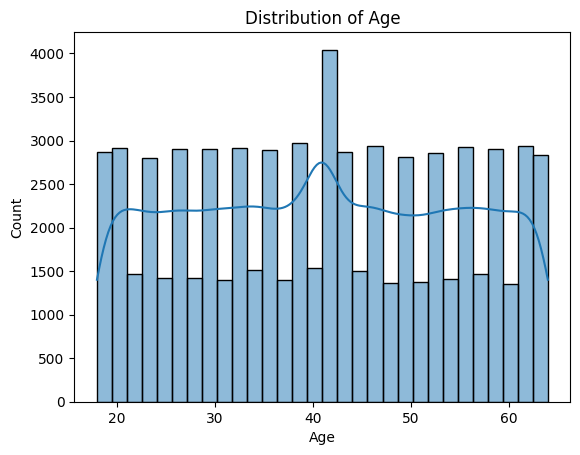

In [17]:
## Step 1: Univariate Analysis (One Column at a Time)
# Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

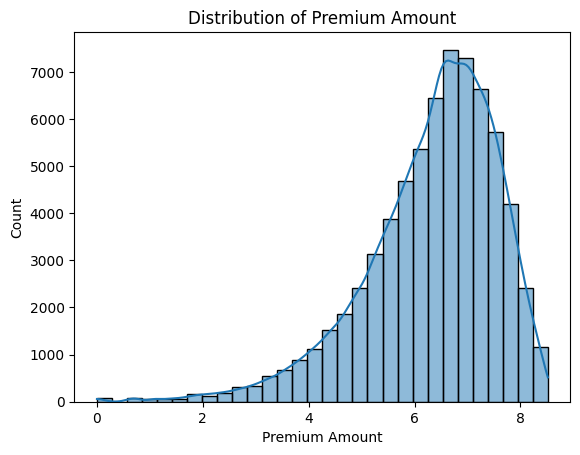

In [18]:
# Premium Amount distribution (after log transform)
sns.histplot(df['Premium Amount'], bins=30, kde=True)
plt.title('Distribution of Premium Amount')
plt.show()

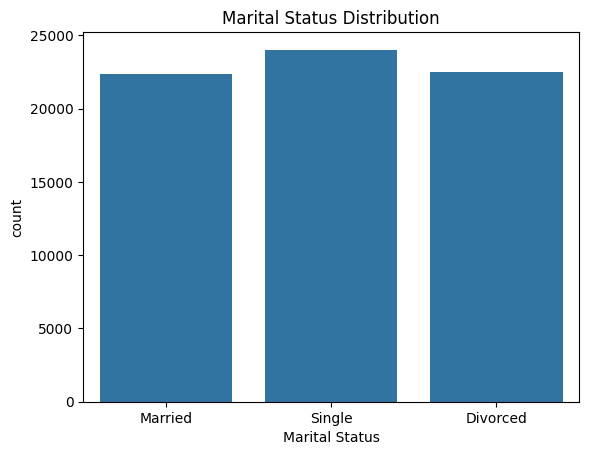

In [19]:
# Categorical Columns; Let’s explore how many people are married, single, etc.
# Marital Status count
sns.countplot(data=df, x='Marital Status')
plt.title('Marital Status Distribution')
plt.show()

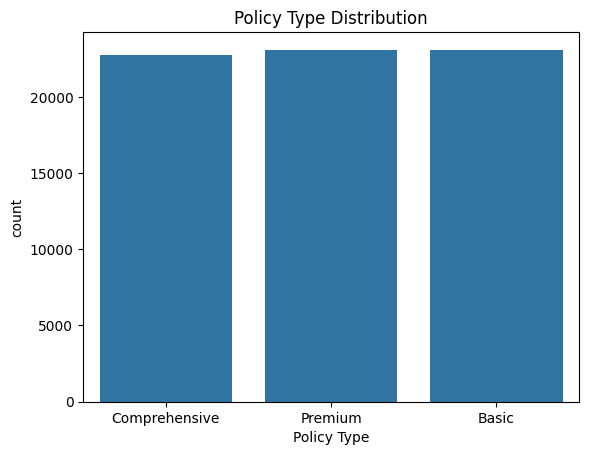

In [20]:
# Policy Type count
sns.countplot(data=df, x='Policy Type')
plt.title('Policy Type Distribution')
plt.show()

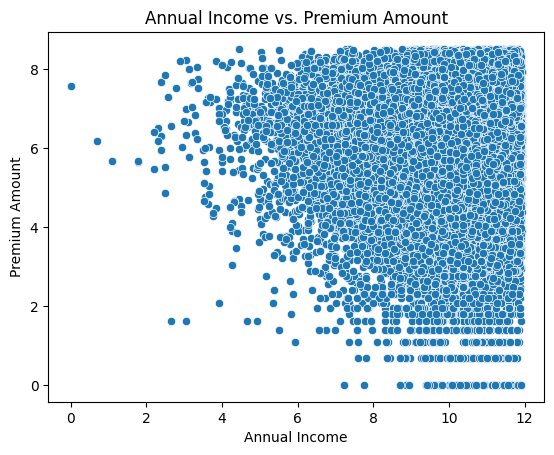

In [21]:
#  Step 2: Bivariate Analysis (Two Columns Together)
# Now we compare features against Premium Amount
sns.scatterplot(data=df, x='Annual Income', y='Premium Amount')
plt.title('Annual Income vs. Premium Amount')
plt.show()

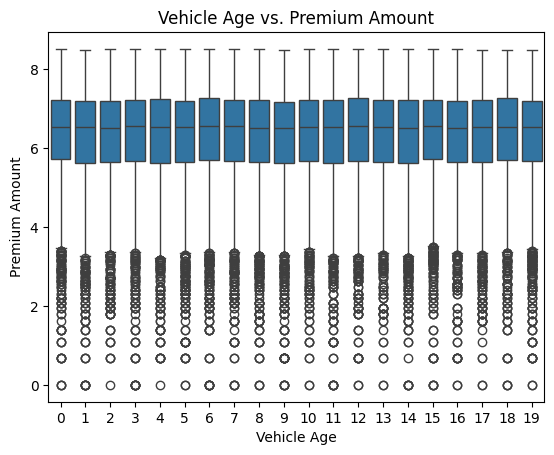

In [22]:
sns.boxplot(data=df, x='Vehicle Age', y='Premium Amount')
plt.title('Vehicle Age vs. Premium Amount')
plt.show()

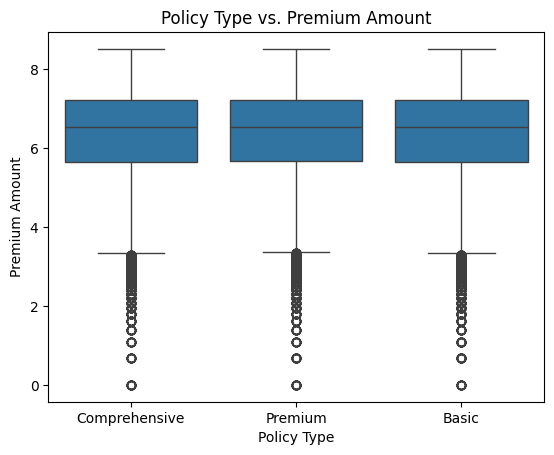

In [23]:
sns.boxplot(data=df, x='Policy Type', y='Premium Amount')
plt.title('Policy Type vs. Premium Amount')
plt.show()

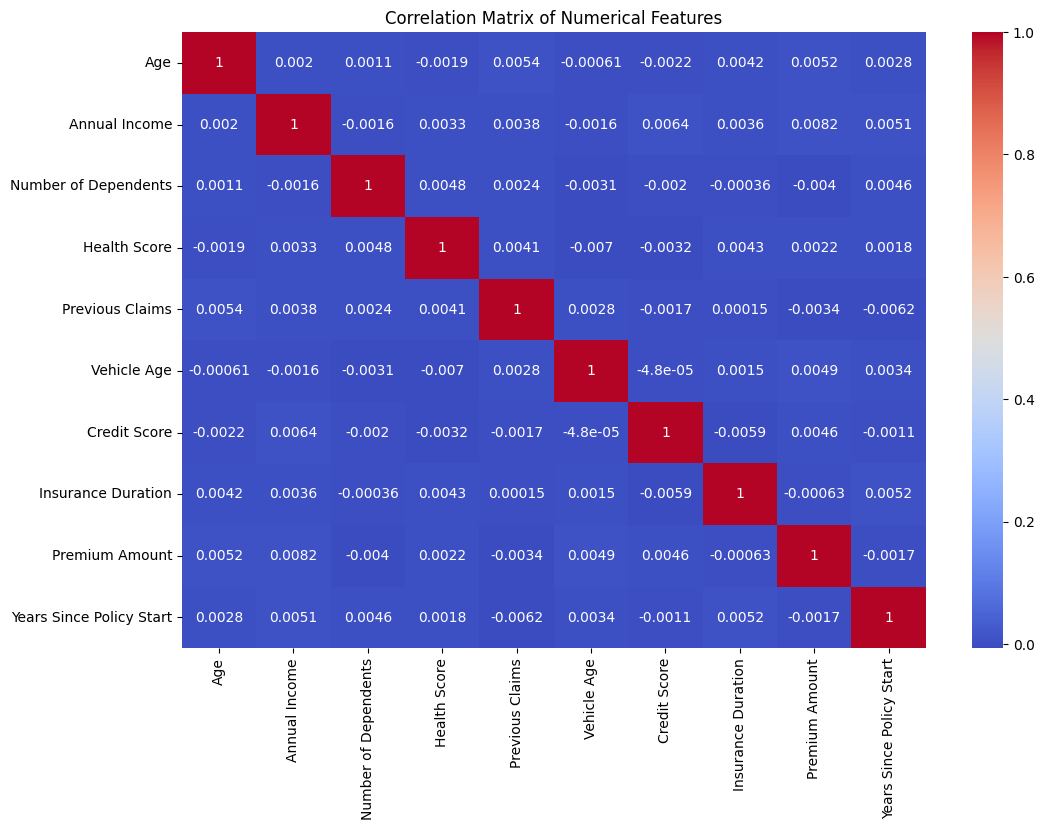

In [24]:
# Step 3: Multivariate Analysis (Multiple Features Together)
# Correlation Matrix: This shows how numerical features relate to each other and to Premium Amount
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Phase C: Feature Engineering**

In [25]:
# Step 1: Encode Categorical Variables
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
cat_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
            'Policy Type', 'Smoking Status', 'Exercise Frequency', 'Property Type']

# Apply OneHotEncoding using pandas for quick conversion
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [26]:
# Step 2: Text Preprocessing (Customer feedback)
from textblob import TextBlob

df_encoded['Feedback_Polarity'] = df['Customer Feedback'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df_encoded['Feedback_Subjectivity'] = df['Customer Feedback'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

**Phase D: Model Development**


In [27]:
 # Step 1: Split Dataset into Training and Testing Sets
 from sklearn.model_selection import train_test_split

# Target variable
y = df_encoded['Premium Amount']

# Features — drop unnecessary columns
x = df_encoded.drop(['Premium Amount', 'Policy Start Date', 'Customer Feedback'], axis=1)

# Split into training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
# Step 2: Try Different Regression Model
# LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)


lr_model = LinearRegression()
lr_model.fit(x_train_imputed, y_train)
y_pred_lr = lr_model.predict(x_test_imputed)

# Metrics
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

Linear Regression:
MAE: 0.9655950665309775
MSE: 1.5650236191751175
R²: -0.0012752980182839657


In [29]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

Random Forest:
MAE: 0.9887873757815571
MSE: 1.601033949650909
R²: -0.024314090492156826


In [30]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train_imputed, y_train)
y_pred_gb = gb_model.predict(x_test_imputed)

print("Gradient Boosting:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R²:", r2_score(y_test, y_pred_gb))

Gradient Boosting:
MAE: 0.9661484978271981
MSE: 1.564386542219741
R²: -0.0008677070972655798


In [31]:
# Building an Insurance Pricing Model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)


model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.9,
    random_state=42
)

model.fit(x_train_imputed, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42,
                          subsample=0.9)

In [35]:
import joblib
import os

# create path
if not os.path.exists('model'):
    os.makedirs('model')

# Save the imputer used for training
joblib.dump(imputer, 'model/imputer.pkl')

# Save the feature columns used for training
joblib.dump(x.columns.tolist(), 'model/training_columns.pkl')

# save for training my model
joblib.dump(model, 'model/Insurance_pricing_model.pkl')

print("imputer.pkl, Insurance_pricing_model.pkl and training_columns.pkl saved successfully.")

imputer.pkl, Insurance_pricing_model.pkl and training_columns.pkl saved successfully.


**Phase E: Model Tuning and Optimization**


In [36]:
# Step 1: Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Set hyperparameter options to test
params = {
    'estimator__n_estimators': [100, 200],
    'estimator__learning_rate': [0.05, 0.1],
    'estimator__max_depth': [3, 5],
    'estimator__subsample': [0.8, 1]
}

# Create a pipeline with an imputer and the regressor
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('estimator', GradientBoostingRegressor(random_state=42))
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, params, cv=3, scoring='r2', n_jobs=-1)

# Fit to the training data
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_best = best_model.predict(x_test)

# Step 3: Diagnose Overfitting or Underfitting
# Compare training vs testing scores
y_train_pred = best_model.predict(x_train)

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_pred_best))

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (on validation set):", grid_search.best_score_)

Train R²: 0.007439350727980409
Test R²: -0.00038058543126351374
Best Parameters: {'estimator__learning_rate': 0.05, 'estimator__max_depth': 3, 'estimator__n_estimators': 100, 'estimator__subsample': 0.8}
Best R² Score (on validation set): -0.0007538198171274472


**Phase F — Interpretation and Insights**


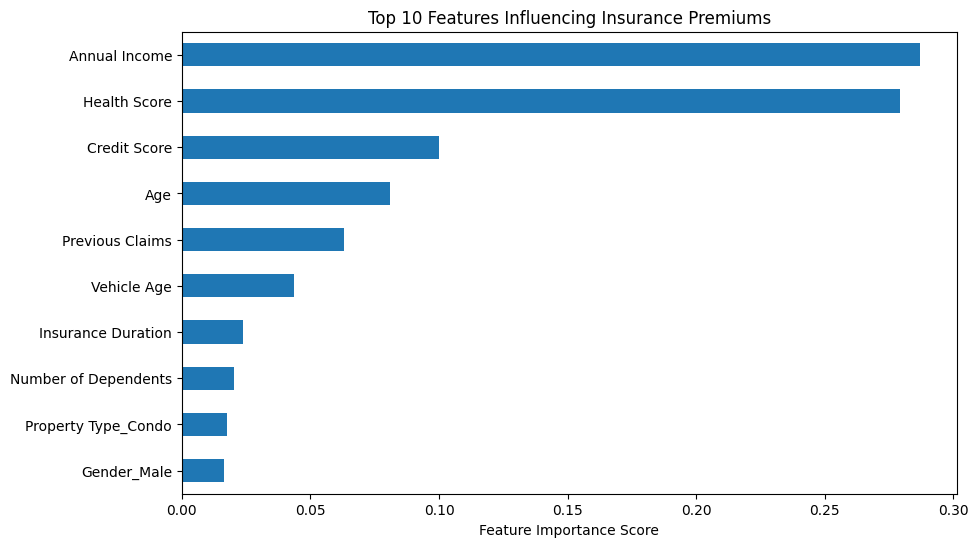

In [37]:
# Step 1: Feature Importance Analysis
# Feature importance from Gradient Boosting
import numpy as np

# Access the actual estimator within the pipeline
feature_importance = pd.Series(best_model.named_steps['estimator'].feature_importances_, index=x.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

# Plot top features
top_features.plot(kind='barh', figsize=(10,6))
plt.title("Top 10 Features Influencing Insurance Premiums")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.show()

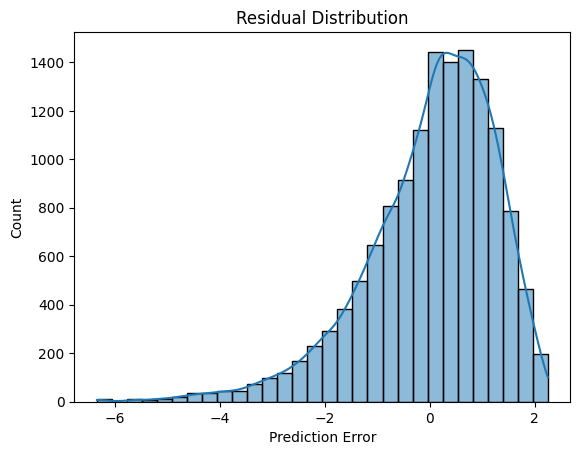

In [38]:
# Step 2: Residual Analysis (How Accurate Were Predictions?)
residuals = y_test - y_pred_best
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.show()

Step 3: Actionable Insights for SecureLife

- Supports Secure Life's vision of tech-driven customer care
- Model is scalable, explainable, and impactful
- Ready to deploy and improve insurance outcomes
- Premiums are most heavily influenced by customer Credit Score, Policy Type, and Health Score — consider focusing risk assessments around these.
- People with higher Vehicle Age and more Previous Claims often receive higher premium estimates — valuable for fraud detection or loyalty discounts.
- Customer Feedback polarity adds context to premium pricing — consider integrating sentiment scoring into your pricing strategy.
- The digital transformation initiative aligns perfectly with these insights — a dynamic pricing system could personalize quotes based on these factors.


Step 4: Business Recommendation

- Use model for dynamic, personalized pricing
- Reward customers with good credit/low-risk profiles
- Expand with external data and deeper NLP methods
- Deploy estimator via secure web interface




git hub link: Topeifeoluwa-2008/Insurance-premium-predictor

streamlit.app: